In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import math
from tqdm import tqdm
from functions import *
from tickers_list import *
sns.set_style('whitegrid')

In [2]:
INITIAL_AMT_INVESTED = 10000
NUM_OF_SIMULATIONS = 5000
start_date='2023-01-01'
end_date='2023-12-31'

In [3]:
## GATHER STOCK PRICES

stock_prices = fetch_data(nifty500_tickers[:150], start_date='2022-01-01', end_date='2022-12-31', div=False)

  9%|███████                                                                          | 13/150 [00:06<00:43,  3.14it/s]

Got error from yahoo api for ticker ADANITRANS.NS, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- ADANITRANS.NS: No timezone found, symbol may be delisted


 17%|█████████████▌                                                                   | 25/150 [00:10<00:38,  3.23it/s]

Got error from yahoo api for ticker AMARAJABAT.NS, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- AMARAJABAT.NS: No timezone found, symbol may be delisted


 19%|███████████████                                                                  | 28/150 [00:11<00:37,  3.27it/s]

Got error from yahoo api for ticker ANGELBRKG.NS, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- ANGELBRKG.NS: No timezone found, symbol may be delisted


 46%|█████████████████████████████████████▎                                           | 69/150 [00:24<00:24,  3.27it/s]

Got error from yahoo api for ticker INFRATEL.NS, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- INFRATEL.NS: No timezone found, symbol may be delisted


 57%|█████████████████████████████████████████████▉                                   | 85/150 [00:29<00:19,  3.31it/s]

Got error from yahoo api for ticker CADILAHC.NS, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- CADILAHC.NS: No timezone found, symbol may be delisted


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:50<00:00,  2.97it/s]


In [35]:
## CALCULATE LOG RETURNS

log_returns = np.log(stock_prices/stock_prices.shift(1))
log_returns = log_returns[1:]

In [15]:
portfolio_weights = []
portfolio_returns = []
portfolio_risks = []
NUM_TRADING_DAYS = len(stock_prices)


## MONTE CARLO SIMULATION

for i in tqdm(range(NUM_OF_SIMULATIONS)):
    
    ## STEP-I: generating random weights
    w = np.random.rand(log_returns.shape[1])
    w = np.expand_dims(w, axis=0)
    w = w/np.sum(w)
    portfolio_weights.append(w)
    
    ## STEP-II: calculating returns using average annual returns
    p_returns = (log_returns.mean() @ w.T*NUM_TRADING_DAYS)[0]
    portfolio_returns.append(p_returns)
    
    ## STEP-III: calculating risks
    p_risks = np.sqrt(w @ log_returns.cov()*NUM_TRADING_DAYS @ w.T)[0][0]
    portfolio_risks.append(p_risks)

100%|████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1318.82it/s]


In [16]:
portfolio_weights = np.array(portfolio_weights)
portfolio_returns = np.array(portfolio_returns)
portfolio_risks = np.array(portfolio_risks)

## CALCULATING SHARPE RATIO

# taking IR of government issued 10-year bonds as risk-free rate
risk_free_rate = 0.07

sharpe_ratios = (portfolio_returns - risk_free_rate) / portfolio_risks

In [18]:
## OPTIMIZED WEIGHTS

index = np.argmax(sharpe_ratios)
optimized_weights = portfolio_weights[index].flatten()

num_of_shares = INITIAL_AMT_INVESTED*optimized_weights/stock_prices.iloc[0,:]
num_of_shares = np.expand_dims(num_of_shares, axis=0)

In [19]:
## CALCULATING PORTFOLIO VALUE
portfolio_value = np.sum(num_of_shares*np.array(stock_prices), axis=1)

## PORTFOLIO DATAFRAME
df_portfolio = num_of_shares*stock_prices
df_portfolio['PORTFOLIO_VALUE'] = portfolio_value

<Axes: xlabel='Date'>

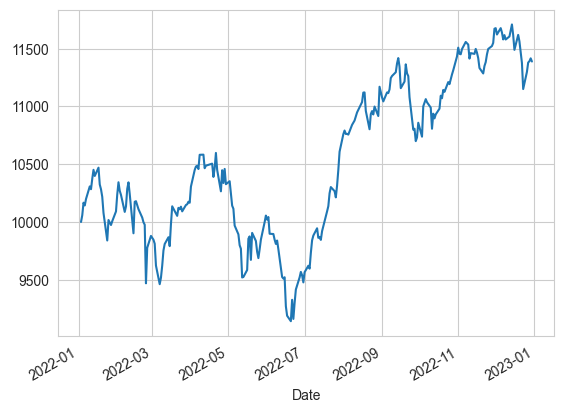

In [21]:
df_portfolio['PORTFOLIO_VALUE'].plot()

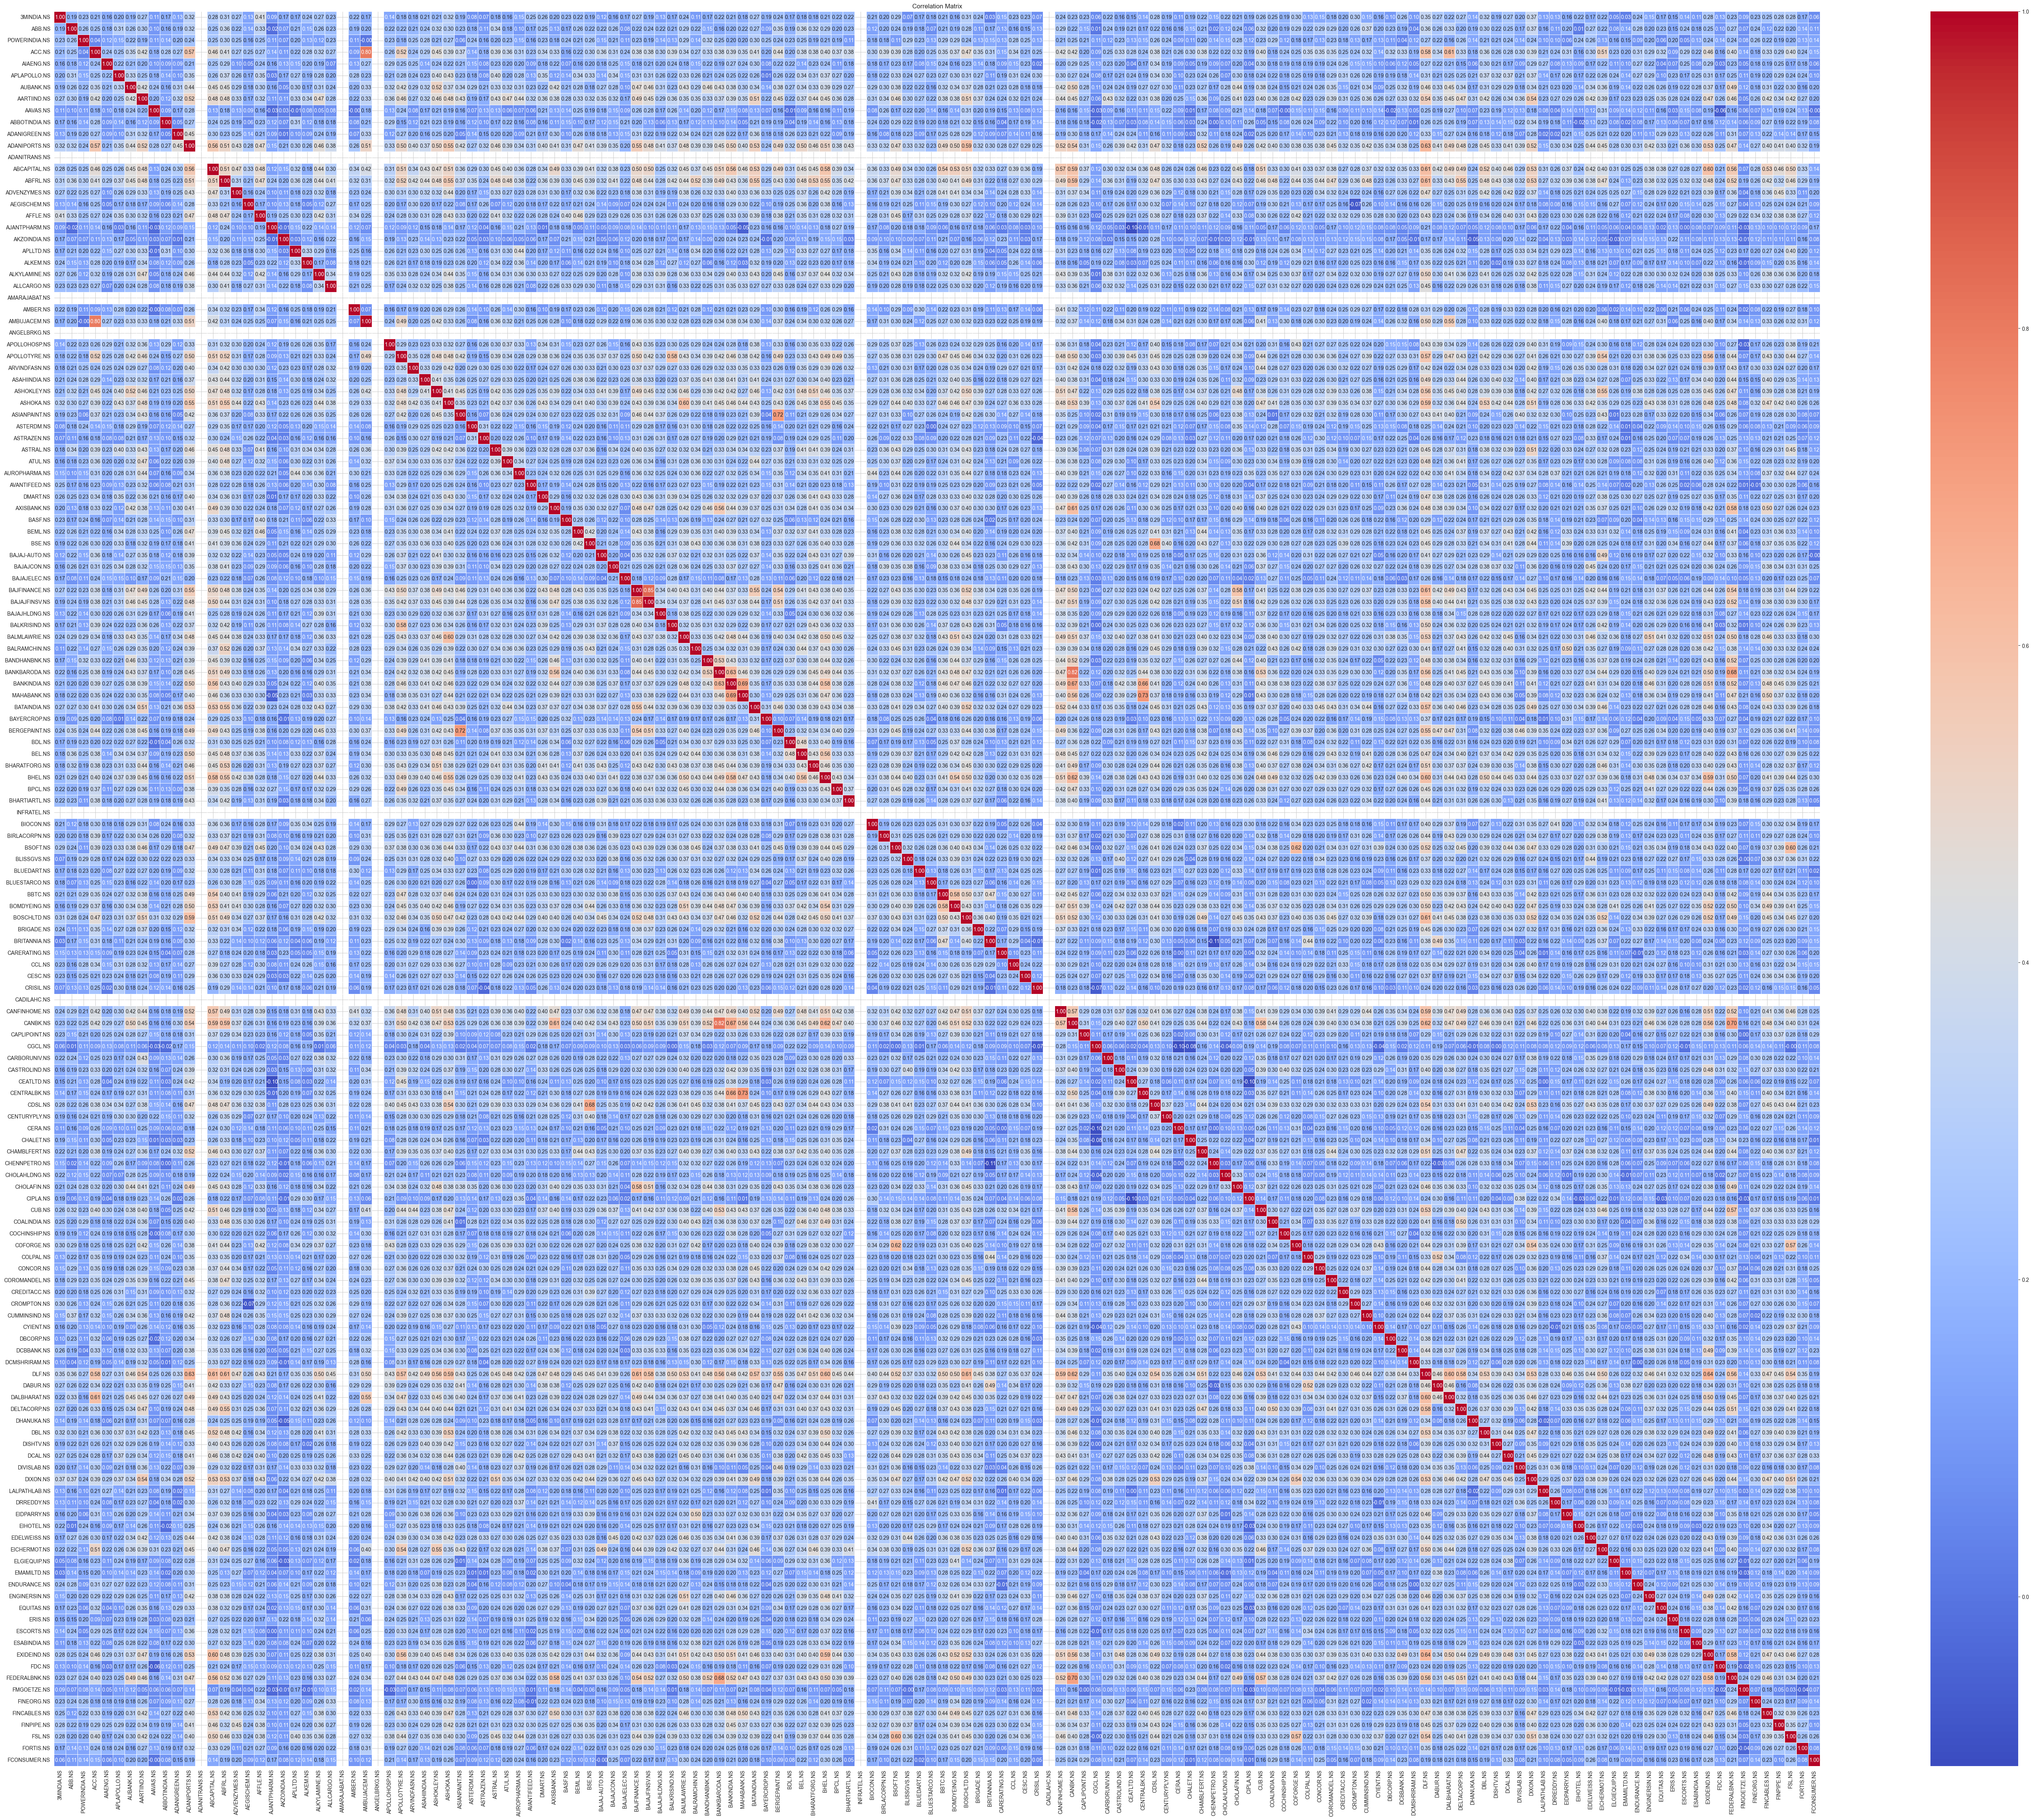

In [36]:
## CORRELATION MATRIX

correlation_matrix = log_returns.corr()

plt.figure(figsize=(75,60))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.savefig('150_stocks_corr.png')

In [33]:
plt.savefig('NIFTY50_correlation.png')

<Figure size 640x480 with 0 Axes>

In [40]:
correlation_matrix.to_excel('150_stocks_correlation.xlsx')

3MINDIA.NS  ABB.NS  POWERINDIA.NS  ACC.NS  AIAENG.NS  \
3MINDIA.NS          False   False          False   False      False   
ABB.NS              False   False          False   False      False   
POWERINDIA.NS       False   False          False   False      False   
ACC.NS              False   False          False   False      False   
AIAENG.NS           False   False          False   False      False   
...                   ...     ...            ...     ...        ...   
FINCABLES.NS        False   False          False   False      False   
FINPIPE.NS          False   False          False   False      False   
FSL.NS              False   False          False   False      False   
FORTIS.NS           False   False          False   False      False   
FCONSUMER.NS        False   False          False   False      False   

               APLAPOLLO.NS  AUBANK.NS  AARTIIND.NS  AAVAS.NS  ABBOTINDIA.NS  \
3MINDIA.NS            False      False        False     False          False   
ABB.NS                False      False        False     False          False   
POWERINDIA.NS         False      False        False     False          False   
ACC.NS                False      False        False     False          False   
AIAENG.NS             False      False        False     False          False   
...                     ...        ...          ...       ...            ...   
FINCABLES.NS          False      False        False     False          False   
FINPIPE.NS            False      False        False     False          False   
FSL.NS                False      False        False     False          False   
FORTIS.NS             False      False        False     False          False   
FCONSUMER.NS          False      False        False      True          False   

               ...  EXIDEIND.NS  FDC.NS  FEDERALBNK.NS  FMGOETZE.NS  \
3MINDIA.NS     ...        False   False          False        False   
ABB.NS         ...        False   False          False        False   
POWERINDIA.NS  ...        False   False          False        False   
ACC.NS         ...        False   False          False        False   
AIAENG.NS      ...        False   False          False        False   
...            ...          ...     ...            ...          ...   
FINCABLES.NS   ...        False   False          False        False   
FINPIPE.NS     ...        False   False          False        False   
FSL.NS         ...        False   False          False        False   
FORTIS.NS      ...        False   False          False         True   
FCONSUMER.NS   ...        False   False          False        False   

               FINEORG.NS  FINCABLES.NS  FINPIPE.NS  FSL.NS  FORTIS.NS  \
3MINDIA.NS          False         False       False   False      False   
ABB.NS              False         False       False   False      False   
POWERINDIA.NS       False         False       False   False      False   
ACC.NS              False         False       False   False      False   
AIAENG.NS           False         False       False   False      False   
...                   ...           ...         ...     ...        ...   
FINCABLES.NS        False         False       False   False      False   
FINPIPE.NS          False         False       False   False      False   
FSL.NS              False         False       False   False      False   
FORTIS.NS           False         False       False   False      False   
FCONSUMER.NS        False         False       False   False      False   

               FCONSUMER.NS  
3MINDIA.NS            False  
ABB.NS                False  
POWERINDIA.NS         False  
ACC.NS                False  
AIAENG.NS             False  
...                     ...  
FINCABLES.NS          False  
FINPIPE.NS            False  
FSL.NS                False  
FORTIS.NS             False  
FCONSUMER.NS          False  

[150 rows x 150 columns]